/var/folders/0j/9zdd5kts0_x1d_dl7qmyj9k80000gn/T/ipykernel_15737/904328699.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Geographic Area'] = df['Geographic Area'].str.replace(r'^\.', '').str.split(' County').str[0]


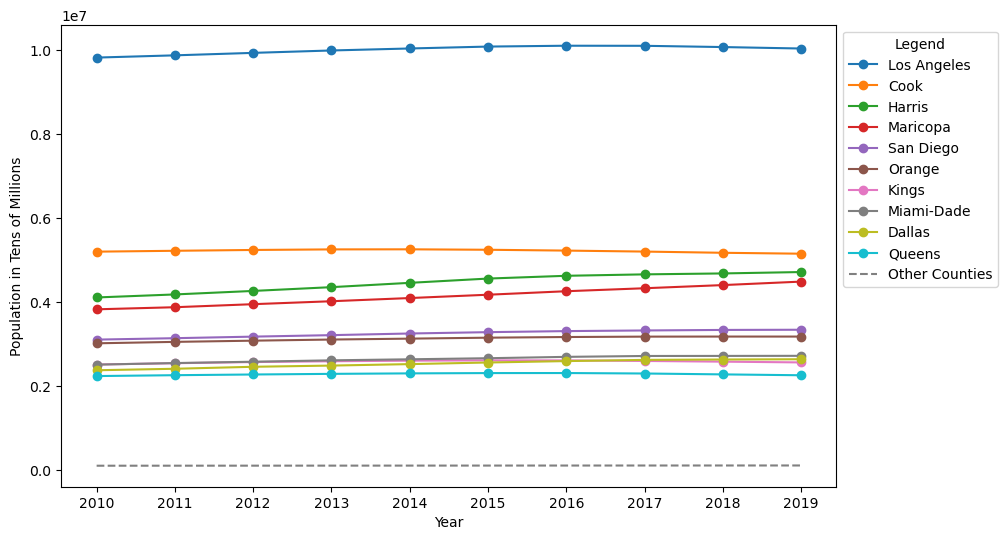

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import LogNorm
import numpy as np

# Read CSV file into a pandas DataFrame
file_path = "US County.csv"
df = pd.read_csv(file_path)

df.columns = df.iloc[0]
df = df[1:]
df = df.iloc[1:]
df = df.iloc[:-6]
df['Geographic Area'] = df['Geographic Area'].str.replace(r'^\.', '').str.split(' County').str[0]

# Convert population columns to numeric (remove commas)
pop_columns = df.columns[1:]
df[pop_columns] = df[pop_columns].replace({',': ''}, regex=True).astype(int)

# Select the top 10 most populous counties
top_counties = df.nlargest(10, 'Census')

# Calculate the mean of other counties
other_counties = df.drop(index=top_counties.index)
mean_county = pd.DataFrame(df.mean(numeric_only=True)).transpose()
mean_county['Geographic Area'] = 'Other Counties'

# Concatenate top counties and mean county
df_combined = pd.concat([top_counties, mean_county])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for idx, row in df_combined.iterrows():
    if row['Geographic Area'] == 'Other Counties':
        ax.plot(row.index[3:], row.values[3:], label=row['Geographic Area'], linestyle='dashed', color='gray')
    else:
        ax.plot(row.index[3:], row.values[3:], label=row['Geographic Area'], marker='o')

#ax.set_title('Top 10 Most Populous Counties')
ax.set_xlabel('Year')
ax.set_ylabel('Population in Tens of Millions')
plt.legend(title='Legend', bbox_to_anchor=(1, 1))
plt.show()


In [2]:
shapefile_path = "US County.shp"
gdf = gpd.read_file(shapefile_path)

In [31]:
# Merge the dataframes
merged_df = gdf.merge(df, left_on="NAME", right_on="Geographic Area", how="inner")
counties_to_remove = ["Hawaii", "Kalawao", "Honolulu", "Maui", "Kauai", "Juneau"]
# population_columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
# for col in population_columns:
#     merged_df[col] = pd.to_numeric(merged_df[col].str.replace(',', ''), errors='coerce')

# Filter out the counties to remove
filtered_df = merged_df[~merged_df["NAME"].isin(counties_to_remove)]

# Winsorize 2019
filtered_df["2019"] = np.where(filtered_df["2019"] >= filtered_df["2019"].std()*4, filtered_df["2019"].std()*4, filtered_df["2019"])

# Normalize Data
vmin = min(filtered_df["2019"])
vmax = max(filtered_df["2019"]) * 1.1
mynorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

def calculate_slope(row):
    try:
        return (row['2018'] - row['2010']) / 8
    except:
        return None

/Users/jjwei/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
filtered_df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",...,8260,8269,8285,8252,8188,8216,8046,8018,7992,7888.0
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",...,15135,14944,14878,14835,14797,14733,14624,14609,14542,14534.0
2,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",...,19965,20051,20050,20026,20055,20166,20130,20092,20116,19788.0
3,20,011,00484975,0500000US20011,20011,Bourbon,06,1645861890,9377600,"POLYGON ((-95.08808 37.73248, -95.08784 37.761...",...,15135,14944,14878,14835,14797,14733,14624,14609,14542,14534.0
4,20,011,00484975,0500000US20011,20011,Bourbon,06,1645861890,9377600,"POLYGON ((-95.08808 37.73248, -95.08784 37.761...",...,19965,20051,20050,20026,20055,20166,20130,20092,20116,19788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,48,117,01383845,0500000US48117,48117,Deaf Smith,06,3876750541,3926557,"POLYGON ((-103.04326 35.12506, -103.04252 35.1...",...,19467,19522,19373,19180,19123,18825,18846,18753,18711,18546.0
14669,45,033,01247993,0500000US45033,45033,Dillon,06,1049113569,4545512,"POLYGON ((-79.63341 34.29799, -79.58450 34.384...",...,32078,31750,31530,31411,31296,31141,30719,30496,30612,30479.0
14670,31,073,00835858,0500000US31073,31073,Gosper,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",...,2040,1991,2080,2017,2004,2025,2025,2028,1996,1990.0
14671,48,171,01383871,0500000US48171,48171,Gillespie,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",...,24874,25039,25175,25363,25473,25916,26206,26483,26702,26988.0


/Users/jjwei/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


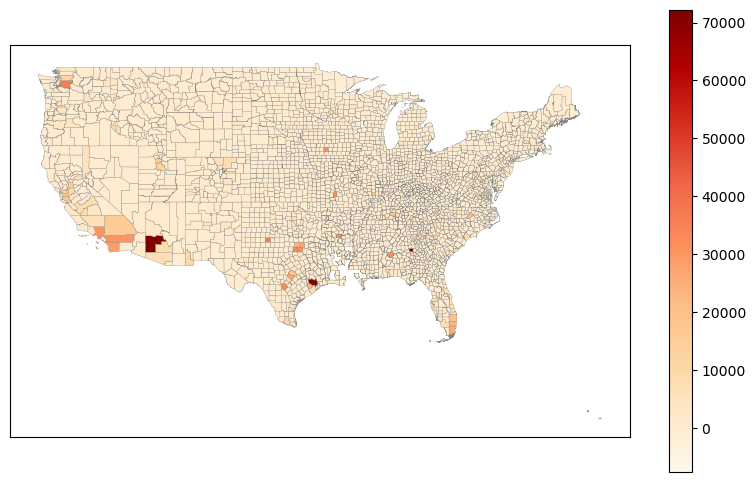

In [32]:
years = range(2010, 2019)
year = "2019"

# Winsorization of the upper tail
filtered_df[year] = np.where(filtered_df[year] >= filtered_df[year].std()*4, filtered_df[year].std()*4, filtered_df[year])

# Calculate the average population growth per year
filtered_df['slope'] = filtered_df.apply(calculate_slope, axis=1)

# Remove the 2019 column
filtered_df = filtered_df.drop('2019', axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
filtered_df.plot(column="slope", cmap='OrRd', linewidth=0.2, ax=ax, edgecolor='gray', legend=True)
ax.set_xticks([])
ax.set_yticks([])
# ax.set_title(year)
plt.show()

In [33]:
slopes = filtered_df[["slope", "NAME"]]
slopes = slopes.sort_values(by='slope', ascending=False)
slopes = slopes.drop_duplicates(subset='NAME')

In [34]:
slopes.head(10)

,slope,NAME
10007,72161.625,Maricopa
13198,71547.375,Harris
12868,36251.625,King
1374,34191.000,Clark
14251,32995.750,Tarrant
12331,32293.625,Bexar
11894,32044.625,Dallas
2283,31332.500,Los Angeles
14664,30526.625,Riverside
3088,29122.000,Orange
